In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_utils import create_date_df

size = 100
ar_params = [0.7]
ma_params = [0.4, -0.2]
residuals = np.random.normal(0, 1, size)

# ARMA(1, 2) == AR(1) + MA(2)
data = [0, 0]
for i in range(2, size):
    # AR(1) : 자기 자신의 직전 항 값을 통해 예측값 생성
    ar_term = ar_params[0] * data[i-1]
    # MA(2) : 현재 항 이전의 2개 항의 오차값을 통해 예측값 생성
    ma_term = ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2]
    # 예측값을 data에 밀어넣음
    data.append(ar_term + ma_term + residuals[i])

df = create_date_df(size, data)
print(df.head(10))

        Date     Value
0 2023-01-01  0.000000
1 2023-01-02  0.000000
2 2023-01-03  0.373283
3 2023-01-04  1.056600
4 2023-01-05  2.374910
5 2023-01-06  2.493804
6 2023-01-07  1.354384
7 2023-01-08  0.591964
8 2023-01-09  2.633754
9 2023-01-10  2.004397


In [2]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Value'], order=(1, 0, 2)) # ARIMA에서 I는 제외하고 (I(0)) 각 차수를 적용
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -135.937
Date:                Fri, 18 Aug 2023   AIC                            281.874
Time:                        15:10:34   BIC                            294.900
Sample:                             0   HQIC                           287.146
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9993      1.348     -0.741      0.458      -3.641       1.643
ar.L1          0.9272      0.064     14.523      0.000       0.802       1.052
ma.L1          0.1757      0.137      1.278      0.2

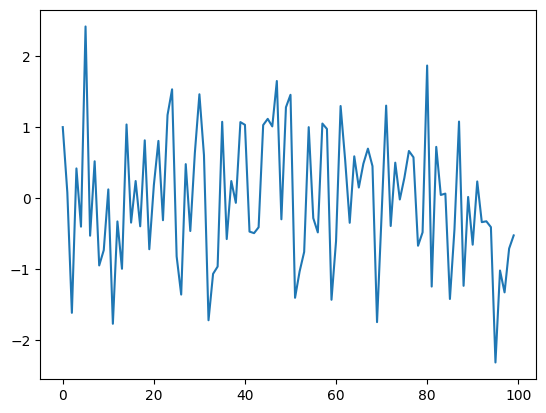

In [3]:
plt.plot(results.resid)
plt.show()